In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import hypertools as hyp
from glob import glob as lsdir
import os
import re
import datetime as dt
import plotly_express as px

from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 

%matplotlib inline    

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [2]:
data_readers = {'xlsx': pd.read_excel, 'xls': pd.read_excel, 'dta': pd.read_stata}
get_extension = lambda x: x.split('.')[-1]


In [3]:
excel_file = 'UVLTData.xls'

UVLT_data = pd.read_excel(excel_file)



WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
np.array(UVLT_data.columns)

array(['ContactID', 'FirstName', 'LastName', 'City', 'State', 'ZipCode',
       'TownID', 'Town', 'LandOwnerTownID', 'DeceasedDate',
       'DeceasedDateYN', 'U_Tot_Amt', 'U_Tot_Cnt', 'U-2000-01',
       'U-2001-02', 'U-2002-03', 'U-2003-04', 'U-2004-05', 'U-2005-06',
       'U-2006-07', 'U-2007-08', 'U-2008-09', 'U-2009-10', 'U-2010-11',
       'U-2011-12', 'U-2012-13', 'U-2013-14', 'U-2014-15', 'U-2015-16',
       'U-2016-17', 'U-2017-18', 'U-2018-19', 'U-2019-20', 'R-Tot-Amt',
       'R-Tot-Cnt', 'R-2000-01', 'R-2001-02', 'R-2002-03', 'R-2003-04',
       'R-2004-05', 'R-2005-06', 'R-2006-07', 'R-2007-08', 'R-2008-09',
       'R-2009-10', 'R-2010-11', 'R-2011-12', 'R-2012-13', 'R-2013-14',
       'R-2014-15', 'R-2015-16', 'R-2016-17', 'R-2017-18', 'R-2018-19',
       'R-2019-20', 'V-Tot-Cnt', 'V-2000-01', 'V-2001-02', 'V-2002-03',
       'V-2003-04', 'V-2004-05', 'V-2005-06', 'V-2006-07', 'V-2007-08',
       'V-2008-09', 'V-2009-10', 'V-2010-11', 'V-2011-12', 'V-2012-13',
       'V-2

In [5]:
UVLT_data.drop(['TownID','DeceasedDate', 'Town','State','FirstName', 'LastName', 'City','U_Tot_Amt', 'U_Tot_Cnt','R-Tot-Amt',
       'R-Tot-Cnt','V-Tot-Cnt', 'V-2000-01', 'V-2001-02', 'V-2002-03',
       'V-2003-04', 'V-2004-05', 'V-2005-06', 'V-2006-07', 'V-2007-08',
       'V-2008-09', 'V-2009-10', 'V-2010-11', 'V-2011-12', 'V-2012-13',
       'V-2013-14', 'V-2014-15', 'V-2015-16', 'V-2016-17', 'V-2017-18',
       'V-2018-19', 'V-2019-20', 'E-Tot-Cnt', 'E-2000-01', 'E-2001-02',
       'E-2002-03', 'E-2003-04', 'E-2004-05', 'E-2005-06', 'E-2006-07',
       'E-2007-08', 'E-2008-09', 'E-2009-10', 'E-2010-11', 'E-2011-12',
       'E-2012-13', 'E-2013-14', 'E-2014-15', 'E-2015-16', 'E-2016-17',
       'E-2017-18', 'E-2018-19', 'E-2019-20'], inplace=True, axis=1)

In [6]:

x = UVLT_data
x.set_index(['ZipCode'])
x.groupby('ZipCode').aggregate(np.mean)
x['2000-1']= x['U-2000-01'] + x['R-2000-01']
x['2001-2']= x['U-2001-02'] + x['R-2001-02']
x['2002-3']= x['U-2002-03'] + x['R-2002-03']
x['2003-4']= x['U-2003-04'] + x['R-2003-04']
x['2004-5']= x['U-2004-05'] + x['R-2004-05']
x['2005-6']= x['U-2005-06'] + x['R-2005-06']
x['2006-7']= x['U-2006-07'] + x['R-2006-07']
x['2007-8']= x['U-2007-08'] + x['R-2007-08']
x['2008-9']= x['U-2008-09'] + x['R-2008-09']
x['2009-10']= x['U-2009-10'] + x['R-2009-10']
x['2010-11']= x['U-2010-11'] + x['R-2010-11']
x['2011-12']= x['U-2011-12'] + x['R-2011-12']
x['2012-13']= x['U-2012-13'] + x['R-2012-13']
x['2013-14']= x['U-2013-14'] + x['R-2013-14']
x['2014-15']= x['U-2014-15'] + x['R-2014-15']
x['2015-16']= x['U-2015-16'] + x['R-2015-16']
x['2016-17']= x['U-2016-17'] + x['R-2016-17']
x['2017-18']= x['U-2017-18'] + x['R-2017-18']
x['2018-19']= x['U-2018-19'] + x['R-2018-19']

x.drop([ 'LandOwnerTownID','U-2000-01','U-2001-02', 'U-2002-03', 'U-2003-04', 'U-2004-05', 'U-2005-06',
       'U-2006-07', 'U-2007-08', 'U-2008-09', 'U-2009-10', 'U-2010-11',
       'U-2011-12', 'U-2012-13', 'U-2013-14', 'U-2014-15', 'U-2015-16',
       'U-2016-17', 'U-2017-18', 'U-2018-19', 'U-2019-20','R-2000-01', 'R-2001-02', 'R-2002-03', 'R-2003-04',
       'R-2004-05', 'R-2005-06', 'R-2006-07', 'R-2007-08', 'R-2008-09',
       'R-2009-10', 'R-2010-11', 'R-2011-12', 'R-2012-13', 'R-2013-14',
       'R-2014-15', 'R-2015-16', 'R-2016-17', 'R-2017-18', 'R-2018-19',
       'R-2019-20'],inplace=True, axis=1)

desired_data = x.loc[x[('DeceasedDateYN')]==0]
desired_data.drop(['ContactID','DeceasedDateYN'],inplace=True, axis=1)
desired_data.set_index(['ZipCode'])
desired_data.groupby('ZipCode').aggregate(np.mean)

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,2000-1,2001-2,2002-3,2003-4,2004-5,2005-6,2006-7,2007-8,2008-9,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
ZipCode,,,,,,,,,,,,,,,,,,,
03756,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
03770,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01002,0.000000,0.0,3.571429,7.142857,7.142857,7.142857,7.142857,14.285714,14.285714,7.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.714286
01007,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01027,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01028,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01033,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01040,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01046,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [7]:
desired_data.shape

(12333, 20)

In [8]:
x_1=desired_data.loc[:,~desired_data.columns.isin(['ZipCode'])].values
x_1.shape

(12333, 19)

In [9]:

x2= np.diff(x_1, axis=1)
print(x2)
x2.shape

[[ 50.   -28.05  78.05 ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.    25.    50.   ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ...   0.     0.    50.  ]
 [  0.     0.     0.   ...   0.     0.    25.  ]
 [  0.     0.     0.   ...   0.     0.    50.  ]]


(12333, 18)

In [10]:

y= np.average(x2,axis=1)
y.shape

(12333,)

In [11]:
#finaldataframe = desired_data.join(pd.DataFrame(y), rsuffix='slope')
finaldata = desired_data.copy()
finaldata.set_index(['ZipCode'])
finaldata.groupby('ZipCode').aggregate(np.mean)



,2000-1,2001-2,2002-3,2003-4,2004-5,2005-6,2006-7,2007-8,2008-9,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
ZipCode,,,,,,,,,,,,,,,,,,,
03756,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
03770,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01002,0.000000,0.0,3.571429,7.142857,7.142857,7.142857,7.142857,14.285714,14.285714,7.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.714286
01007,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01027,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01028,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01033,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01040,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
01046,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [17]:
finaldata['Growth'] = y.tolist()
x5 = finaldata.groupby('ZipCode').aggregate(np.mean)
x5.sort_values('Growth', ascending=False)

#Data organized by zip code and growth

,2000-1,2001-2,2002-3,2003-4,2004-5,2005-6,2006-7,2007-8,2008-9,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,Growth
ZipCode,,,,,,,,,,,,,,,,,,,,
02199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7000.000000,7000.000000,6000.000000,7000.000000,7000.000000,6000.000000,7000.000000,7000.000000,7000.000000,10000.000000,10000.000000,555.555556
05462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7500.000000,416.666667
20895,25.000000,50.000000,25.000000,50.000000,100.000000,100.000000,100.000000,150.000000,200.000000,200.000000,200.000000,200.000000,200.000000,250.000000,1000.000000,250.000000,250.000000,250.000000,5250.000000,290.277778
01778,20.000000,60.000000,50.000000,100.000000,50.000000,50.000000,50.000000,50.000000,20.000000,0.000000,50.000000,0.000000,50.000000,50.000000,60.000000,0.000000,50.000000,50.000000,4050.000000,223.888889
28711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,100.000000,50.000000,100.000000,100.000000,50.000000,100.000000,50.000000,50.000000,2500.000000,138.888889
29455,2000.000000,2000.000000,3500.000000,4000.000000,4000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4000.000000,4000.000000,4000.000000,0.000000,8000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,111.111111
06001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,1000.000000,1000.000000,2000.000000,2000.000000,2000.000000,2000.000000,111.111111
98119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1000.000000,0.000000,500.000000,500.000000,500.000000,1000.000000,1000.000000,55.555556
05071,0.000000,0.000000,2.325581,52.325581,69.767442,12.209302,106.976744,144.767442,161.883721,176.162791,154.651163,603.586279,12.209302,1105.232558,38.372093,548.837209,583.720930,702.325581,813.953488,45.219638


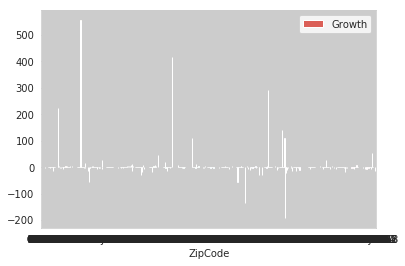

In [14]:
x5.plot.bar(y='Growth',rot=0)

#Bar graph offers a visual demonstration of how variable donation growth is among zipcodes

In [18]:
x6= x5.sort_values('Growth', ascending=False)
x6.head(5)

#x6 shows the five zipcodes with the fastest growing donations


,2000-1,2001-2,2002-3,2003-4,2004-5,2005-6,2006-7,2007-8,2008-9,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,Growth
ZipCode,,,,,,,,,,,,,,,,,,,,
02199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000.0,7000.0,6000.0,7000.0,7000.0,6000.0,7000.0,7000.0,7000.0,10000.0,10000.0,555.555556
05462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7500.0,416.666667
20895,25.0,50.0,25.0,50.0,100.0,100.0,100.0,150.0,200.0,200.0,200.0,200.0,200.0,250.0,1000.0,250.0,250.0,250.0,5250.0,290.277778
01778,20.0,60.0,50.0,100.0,50.0,50.0,50.0,50.0,20.0,0.0,50.0,0.0,50.0,50.0,60.0,0.0,50.0,50.0,4050.0,223.888889
28711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,50.0,100.0,100.0,50.0,100.0,50.0,50.0,2500.0,138.888889
